##### Problem Statement
###### The dataset contains a wine ingridents used in preparing a wine and I have to find the best conbination or proportion  of  ingridents to produce a quality wine. So, I have to predict the best conbination using the ration to get a quality wine


In [434]:
# Importing the necessary libraries 
import pandas as pd 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,roc_auc_score,auc
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import numpy as np

###### Importing the dataset

In [214]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Medium,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Medium,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Medium,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Medium,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,High,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,High,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Medium,5


In [215]:
data.sample(n=30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
313,8.6,0.470,0.30,3.00,0.076,30.0,135.0,0.99760,3.30,0.53,9.40,Low,5
1368,8.0,0.770,0.32,2.10,0.079,16.0,74.0,0.99656,3.27,0.50,9.80,Medium,6
1593,6.8,0.620,0.08,1.90,0.068,28.0,38.0,0.99651,3.42,0.82,9.50,Medium,6
367,10.4,0.575,0.61,2.60,0.076,11.0,24.0,1.00000,3.16,0.69,9.00,Low,5
1151,6.1,0.580,0.23,2.50,0.044,16.0,70.0,0.99352,3.46,0.65,12.50,High,6
322,7.8,0.620,0.05,2.30,0.079,6.0,18.0,0.99735,3.29,0.63,9.30,Low,5
909,7.3,0.305,0.39,1.20,0.059,7.0,11.0,0.99331,3.29,0.52,11.50,High,6
563,7.6,0.290,0.49,2.70,0.092,25.0,60.0,0.99710,3.31,0.61,10.10,Medium,6
1025,8.6,0.830,0.00,2.80,0.095,17.0,43.0,0.99822,3.33,0.60,10.40,Medium,6
702,7.0,0.640,0.02,2.10,0.067,9.0,23.0,0.99700,3.47,0.67,9.40,Low,6


###### Observation!!!! 

###### This dataset contains  numerical and categorical columns. The features variables  are ingridents  used in preparing a wine and the ratio depends on how good is the quality of the wine.  However, "quality" which is the target variable contains multi-classes  but according to the project instruction will should set a bench mark (treshold) on the target variable, that is if conbination of our ratio is higher than 7, it should be classified as good/1 , and if it is less not good/0. 


##### After removing duplicates our data size is now 1339 rows, 13 columns. Iinitially it was 1599

In [216]:
# checking the dataset types
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
Alcohol_content          object
quality                   int64
dtype: object

###### There are three types of data present in  the dataset (Float64,Object and int64)

In [217]:
# looking for any missing values 
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Alcohol_content       1599 non-null   object 
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


###### This give brief about the dataset which inckudes ( RangeIndex, total columns , Non-Null count and data types
###### No null values present in the dataset. 

<Axes: >

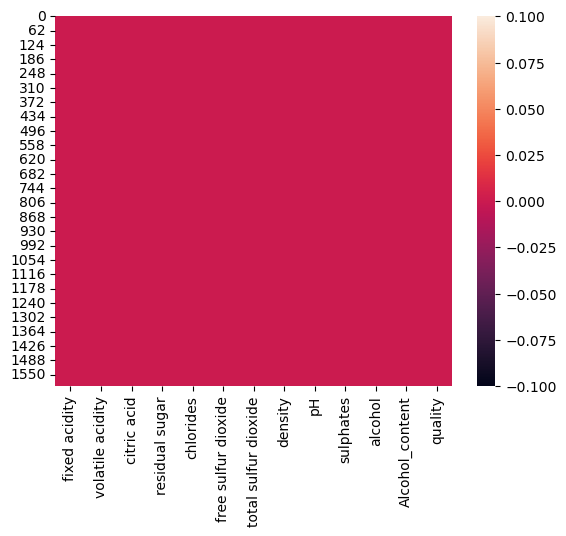

In [219]:
# Visualizing the nulls values using heatmap
sns.heatmap(data.isnull())

##### Again the heatmap color code at 0.000 scale shows there are no null values present in the dataset

In [220]:
# Checking number of unique values in each column
data.nunique().to_frame('No. of unique values')

,No. of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


##### These are the columns unique values

In [221]:
# checking value counts 
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

##### I noticed there is no black value counts in any of the columns. 

##### We observed that Alcohol_Content columns contains categorical data (Medium, low, High ). Which means the data is in order. So we need to use ordinal encoding technique to transform the object data into numerical  because our machine only understand numbers and not object  data

In [222]:
from sklearn.preprocessing import OrdinalEncoder

In [223]:
ordinal_encoder = OrdinalEncoder(categories=[['Low','Medium','High']])# transforming string into interger because our model only knows numbers 

data1 = ordinal_encoder.fit_transform(data[['Alcohol_content']]) # Transforming low =0, medium =1, high=2

data1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

##### I have converted my categorical column 'Alcohol_content' to a numrical data whereby low is trasnformed to 0, medium is trasformed to 1 and High is transformed to 2

In [224]:
data['Alcohol_content']= data1 # overide alcohol_content  from our main dataset

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


##### It is clear Alcohol_content has transformed to numerical data 

In [225]:
# checking data types 
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
Alcohol_content         float64
quality                   int64
dtype: object

##### Now our Alcohol_content data type is now float64

In [226]:
# statistical summary of numeric columns
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,1.106316,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.683218,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,2.000000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,2.000000,8.000000


###### Numerical columns of the stitistical details shows our dataset has no negative or missing values. 
###### Below is listed  observation from the above data description
###### 1. All the columns counts are same values, that is there are no missing values in the dataset. 
#####  2.  The STD is high compare to the mean in total sulfur dioxide, also free sulfur dioxide. 
##### 3. I am noticing outliers in fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, alcohol,sulphate

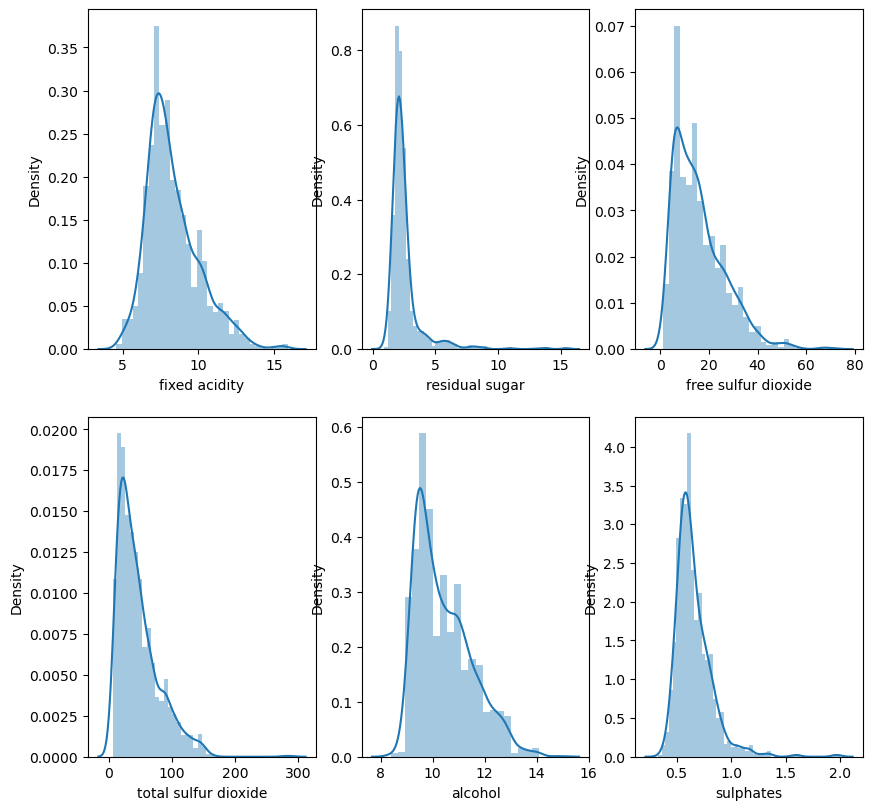

In [227]:
# seeing how the data has been distributed in all the columns 
plt.figure(figsize=(10,15))
plotnumber = 1
for column in data[['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','alcohol','sulphates']]:
    if plotnumber <= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize= 10)
    plotnumber +=1
plt.show()

###### In the above distribution plot all the columns fellow a bell shape and the data are almost normally distributed, and have outliers

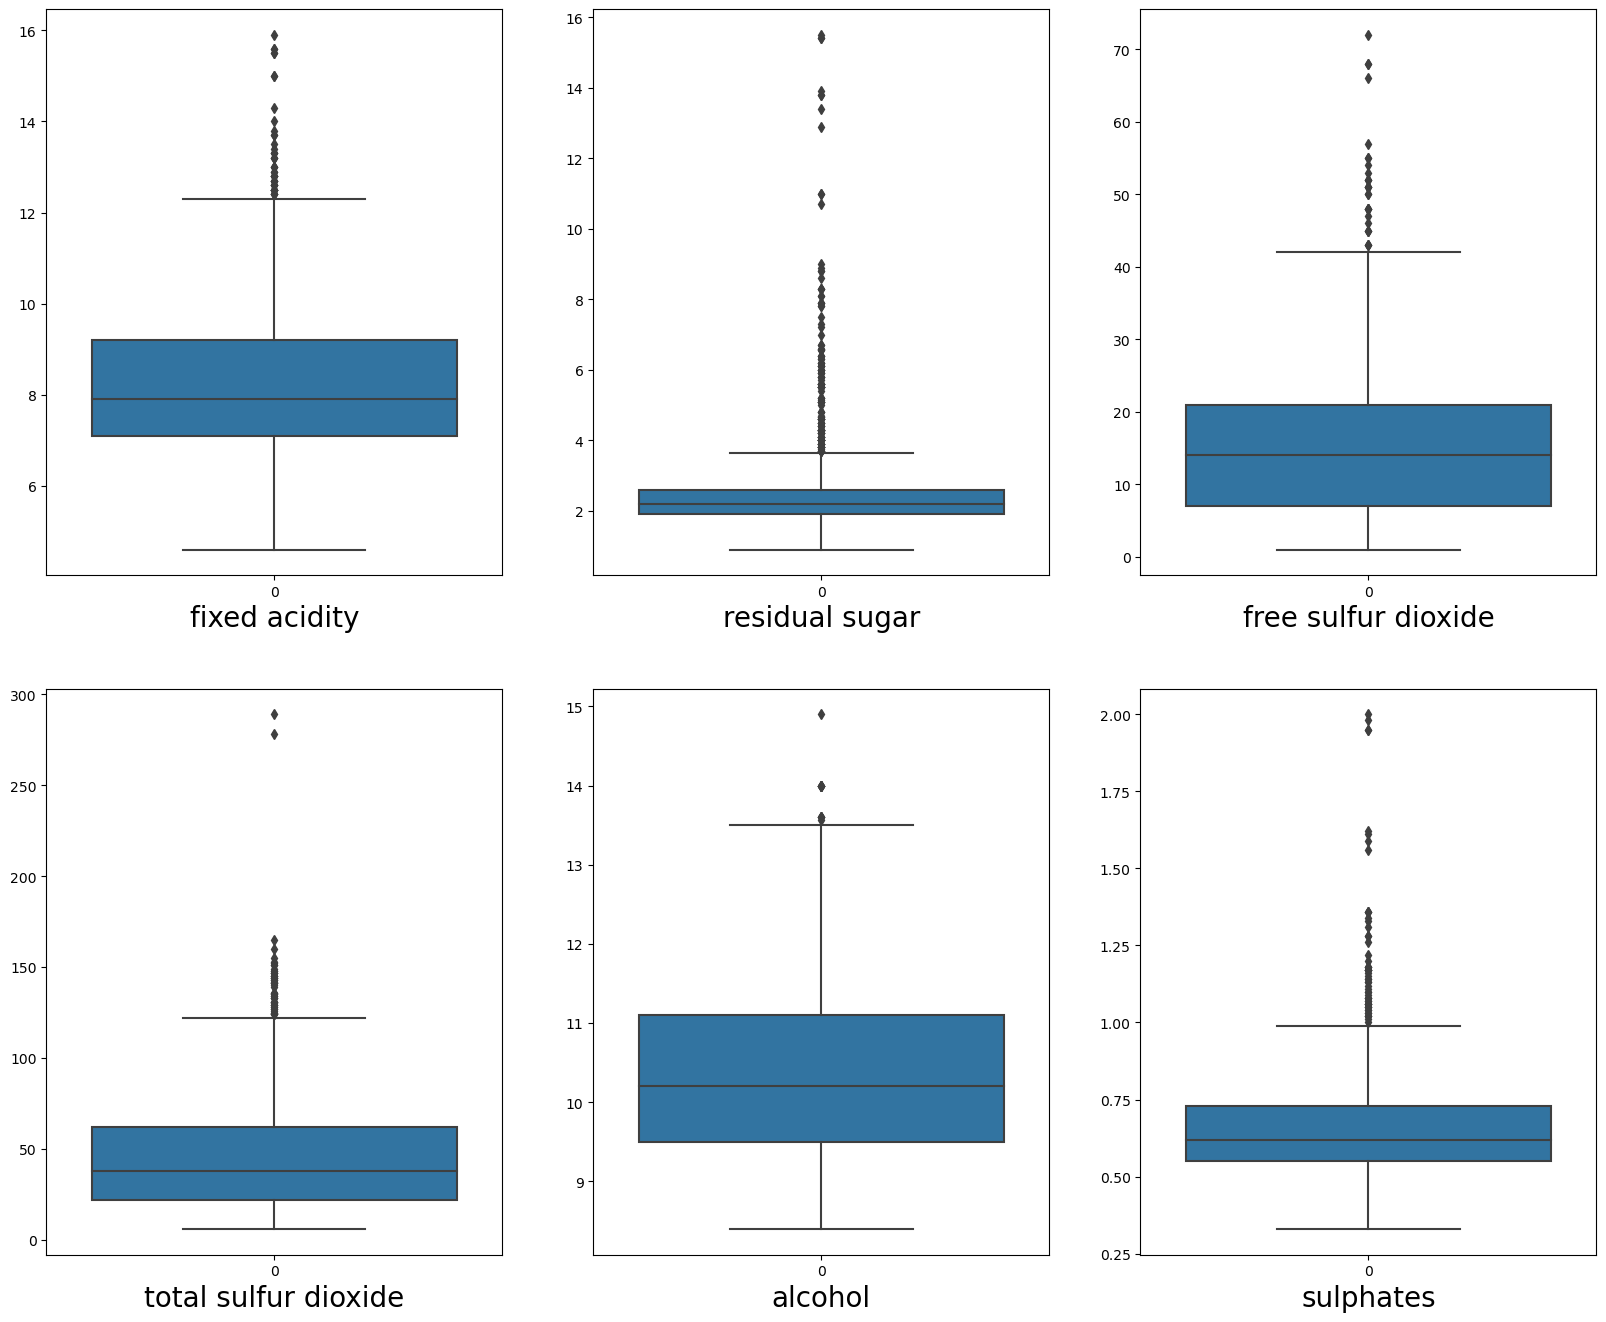

In [228]:
# seeing how the data has been distributed in all the columns 
plt.figure(figsize=(20,25))
plotnumber = 1
for column in data[['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','alcohol','sulphates']]:
    if plotnumber <= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize= 20)
    plotnumber +=1
plt.show()

###### There are Outliers in the continuous columns (fixed acidity, residual sugar, fixed sulfur dioxide, total sulfur dioxide, acohol, suplhates). The remaining are discrete /categorical columns, and also quality which is the label.

###### Removing Outliers using z-score


In [231]:
from scipy.stats import zscore
outliers_features = data[['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','alcohol','sulphates']]
z_score= np.abs(zscore(outliers_features)) # np.abs is use when the values are positive
z_score

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol,sulphates
0,0.528360,0.453218,0.466193,0.379133,0.960246,0.579207
1,0.298547,0.043416,0.872638,0.624363,0.584777,0.128950
2,0.298547,0.169427,0.083669,0.229047,0.584777,0.048089
3,1.654856,0.453218,0.107592,0.411500,0.584777,0.461180
4,0.528360,0.453218,0.466193,0.379133,0.960246,0.579207
...,...,...,...,...,...,...
1594,1.217796,0.382271,1.542054,0.075043,0.072294,0.461180
1595,1.390155,0.240375,2.211469,0.137820,0.729364,0.601055
1596,1.160343,0.169427,1.255161,0.196679,0.541630,0.542042
1597,1.390155,0.382271,1.542054,0.075043,0.209308,0.305990


In [232]:
# Threshold = 3
np.where(z_score>3)

(array([  13,   14,   15,   15,   17,   33,   43,   57,   81,   86,   88,
          91,   92,  106,  109,  142,  144,  151,  163,  164,  169,  226,
         243,  244,  258,  274,  324,  325,  339,  340,  347,  354,  374,
         381,  391,  396,  396,  400,  400,  442,  467,  480,  494,  515,
         544,  554,  555,  557,  584,  588,  591,  595,  614,  636,  639,
         649,  649,  651,  652,  652,  652,  672,  684,  692,  723,  795,
         821,  911,  917,  923,  925,  926,  982, 1043, 1051, 1071, 1074,
        1079, 1079, 1081, 1081, 1131, 1154, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1269, 1270, 1288, 1289, 1295, 1296, 1319, 1358, 1367,
        1370, 1372, 1434, 1434, 1435, 1435, 1474, 1474, 1476, 1476, 1493,
        1496, 1558, 1574, 1589], dtype=int64),
 array([5, 2, 2, 3, 5, 1, 5, 2, 5, 5, 5, 5, 5, 5, 3, 4, 4, 5, 1, 1, 5, 5,
        0, 0, 5, 1, 1, 1, 5, 5, 0, 3, 0, 0, 0, 1, 2, 1, 2, 0, 4, 1, 1, 3,
        0, 0, 0, 0, 2, 4, 3, 1, 5, 3, 5, 1, 3, 3, 0, 1, 4, 3, 3, 

In [233]:
# z score for index position 1589 and 1
z_score.iloc[1574,1]

8.060516762374213

##### These are the index location of the z score  data is > 3 

In [234]:
# Now removing the data above the zscore and creating new DF
new_data = data[(z_score <3).all(axis =1)]

new_data.shape

(1499, 13)

###### Outliers have been removed 

In [235]:
# Lets see the shape of our old data and new data 
print('Old Data -', data.shape)
print('new_data -', new_data.shape)

Old Data - (1599, 13)
new_data - (1499, 13)


###### After removing the outliers, 100 rows of data were lost but lets see the % lost

In [236]:
# % of Data lost
print('Data Loss Percentage', ((data.shape[0]-new_data.shape[0])/new_data.shape[0])*100)

Data Loss Percentage 6.671114076050701


##### 6.7% of our data is lost but is fine because is not more than 10%

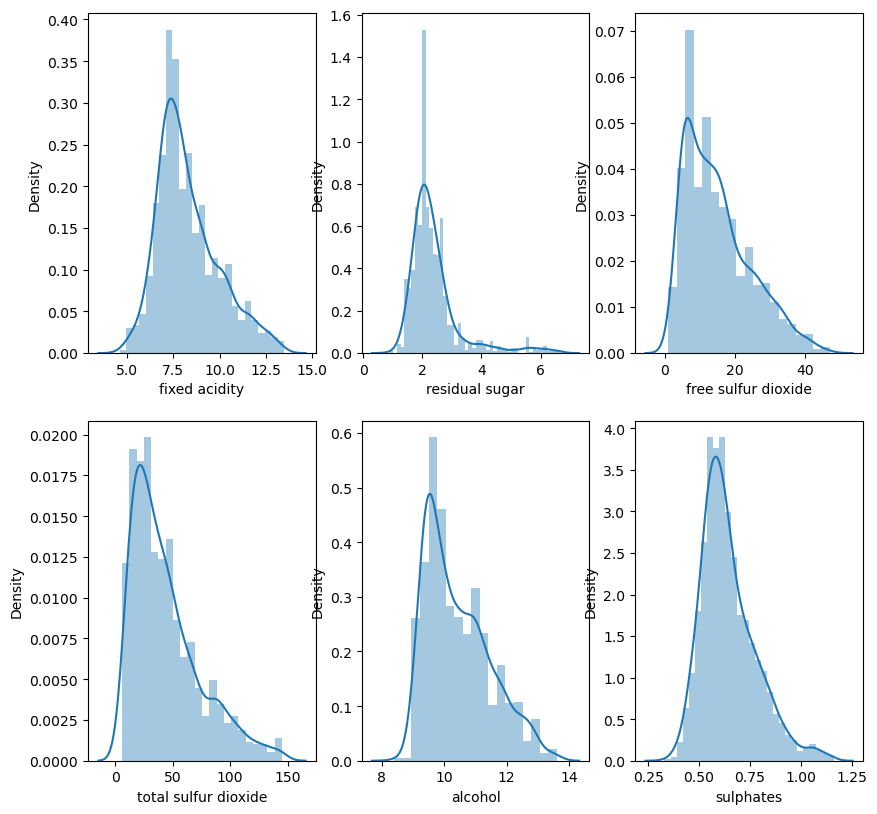

In [237]:
plt.figure(figsize=(10,15))
plotnumber = 1
for column in new_data[['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','alcohol','sulphates']]:
    if plotnumber <= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column,fontsize= 10)
    plotnumber +=1
plt.show()

###### The above distributed shows our data almost look normal in all columns but still observing skewness in almost all  the continuons features.

In [238]:
# checking the skewness
new_data.skew()

fixed acidity           0.793316
volatile acidity        0.677798
citric acid             0.294756
residual sugar          2.428991
chlorides               5.175022
free sulfur dioxide     0.872639
total sulfur dioxide    1.165305
density                -0.043742
pH                      0.310325
sulphates               0.961090
alcohol                 0.757631
Alcohol_content        -0.148143
quality                 0.179445
dtype: float64

In [239]:
# Removing skewness 
new_data['fixed acidity'] = np.cbrt(new_data['fixed acidity'])
new_data['residual sugar'] = np.cbrt(new_data['residual sugar'])
new_data['free sulfur dioxide'] = np.cbrt(new_data['free sulfur dioxide'])
new_data['total sulfur dioxide'] = np.cbrt(new_data['total sulfur dioxide'])
new_data['sulphates'] = np.cbrt(new_data['sulphates'])
new_data['alcohol'] = np.cbrt(new_data['alcohol'])


In [240]:
new_data.skew()

fixed acidity           0.480255
volatile acidity        0.677798
citric acid             0.294756
residual sugar          1.583032
chlorides               5.175022
free sulfur dioxide     0.130491
total sulfur dioxide    0.333798
density                -0.043742
pH                      0.310325
sulphates               0.571632
alcohol                 0.644024
Alcohol_content        -0.148143
quality                 0.179445
dtype: float64

###### Skewness has been removed 

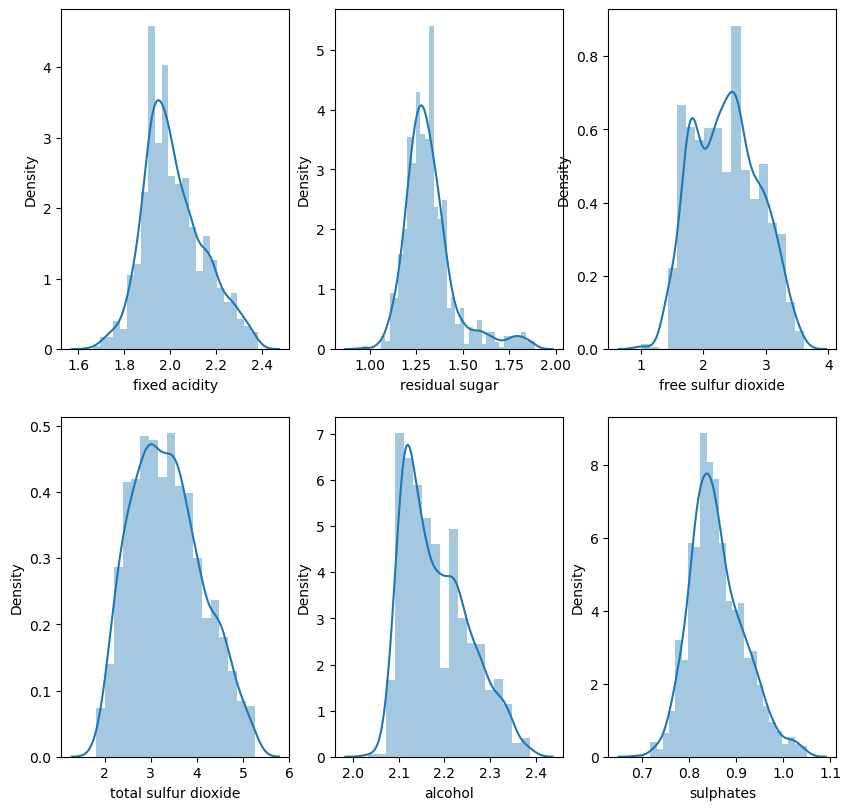

In [241]:
plt.figure(figsize=(10,15))
plotnumber = 1
for column in new_data[['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','alcohol','sulphates']]:
    if plotnumber <= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column,fontsize= 10)
    plotnumber +=1
plt.show()

###### This distribution looks almost normal after skewness has been removed 

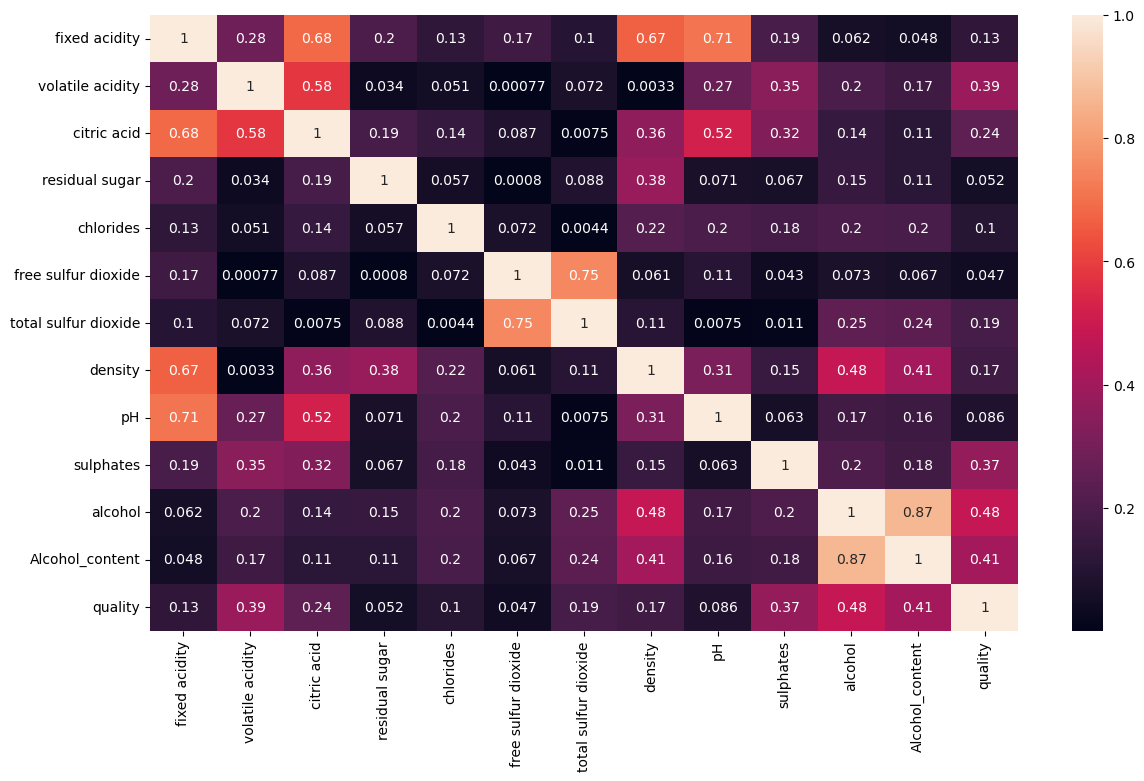

In [242]:
# Finding  Features that have multicollinearity issue.

df_corr = new_data.corr().abs() # This code will get the coffiecient of one variable vs all other variable(Relationship)

plt.figure(figsize=(14,8))

sns.heatmap(df_corr, annot=True, annot_kws={'size':10})

plt.show()

##### Due to the above heatmap , the color scale that shows  brighter box number means they have muliticollinearity problem. In this case I noticed Alcohol content and alcohol are 85% which is the brightest, that is they are correlated. If  one increases the other directly increases. This is a direct relationship between alcohol content and alcohol.This is what I am seeing on the heatmap. lets look at one more proof to show they are truly correlated with this below simply scatter plot

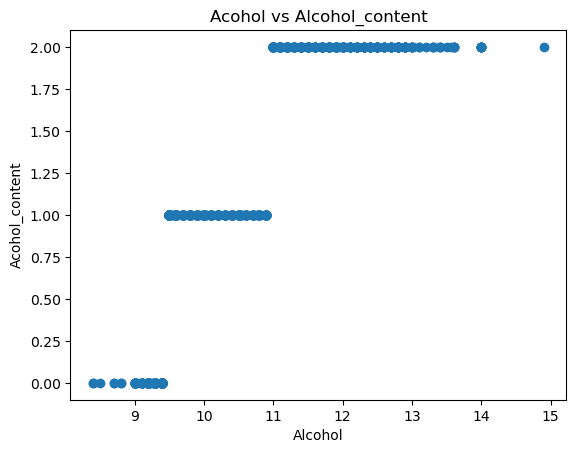

In [243]:
# Using scatter plot to visualize multicorilinearity in Alcohol and Alcohol_content
plt.scatter(x = data.alcohol, y= data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Acohol_content')
plt.title('Acohol vs Alcohol_content')
plt.show()

##### The scatter plot above display what we observed on the heatmap. if alcohol level increases the alcohol content increases also.  This means both columns are directly correlated to each other . In ths case we have to drop Alcohol_content to solve the multicorrilinearity issue.


In [250]:
# Dropping alcohol_content and quality on x  column and storing qaulity on y .
x = new_data.drop(columns=['quality','Alcohol_content'])

y = new_data['quality']


###### Alcohol_content and quality have been dropped from the main data set and stored in x variable. Why quality is stored in y variable

In [246]:
x.shape

(1499, 11)

###### The size of our data is now 1499 rows and 11 columns. We dropped to columns from our dataset, Alcohol_content and quality but quality which is label was stored in Y variable

###### Model Building 

###### Importing  all my models from neccessary library

In [345]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score 

###### Spliting my data into train and test 

In [339]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=41)

##### Writing  one function and call as many as times to check the accuracy_score of different models

In [427]:

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train)
        
        print("\n============Train Result=====================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==================Test Result==================")
        print(f"Accuracy Score:{accuracy_score(y_test, pred) * 100:.2f}%")
              
        print('\n\n Test Classification Report \n',classification_report(y_test, pred, digits=2)) #confidence/accuracy
        print()
              

###### Decision Tree Classifier 

In [366]:
# Checking accuracy score for decision tree sclassifier 
dsc = DecisionTreeClassifier()
dsc.fit(x_train,y_train)
metric_score(dsc, x_train, x_test, y_train, y_test, train = True)
metric_score(dsc, x_train, x_test, y_train, y_test, train = False)
#confusion matrix for multi class
dsc_pred = dsc.predict(x_test)# Predict for confusion Matrix
# Creat confusion matrix and  converting into Dataframe to undertand this better
pd.DataFrame(confusion_matrix(y_test, y_pred), columns =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8,'], index =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])


============Train Result=====================
Accuracy Score: 100.00%

==================Test Result==================
Accuracy Score:61.07%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.10      0.14      0.12         7
           5       0.70      0.66      0.68       150
           6       0.60      0.63      0.61       163
           7       0.53      0.60      0.56        45
           8       0.00      0.00      0.00         6

    accuracy                           0.61       375
   macro avg       0.32      0.34      0.33       375
weighted avg       0.61      0.61      0.61       375




,Q3,Q4,Q5,Q6,Q7,"Q8,"
Q3,0,0,4,0,0,0
Q4,0,0,6,1,0,0
Q5,2,1,105,41,1,0
Q6,0,2,43,105,12,1
Q7,0,0,2,20,23,0
Q8,0,0,0,4,2,0


##### The accuracy score of this model is 61.07%

##### Logistic Regression

In [368]:
# cheking the accuracy score for Logistic Regression 
lr = LogisticRegression()
lr.fit(x_train,y_train) # training the model
metric_score(lr, x_train, x_test, y_train, y_test, train = True) # calling the function for for train and test score 
metric_score(lr, x_train, x_test, y_train, y_test, train = False)
lr_pred = lr.predict(x_test)# Predict for confusion Matrix
# Creat confusion matrix and  converting into Dataframe to undertand this better

pd.DataFrame(confusion_matrix(y_test, y_pred), columns =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8,'], index =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])



============Train Result=====================
Accuracy Score: 60.32%

==================Test Result==================
Accuracy Score:60.53%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.62      0.77      0.68       150
           6       0.60      0.57      0.58       163
           7       0.59      0.42      0.49        45
           8       0.00      0.00      0.00         6

    accuracy                           0.61       375
   macro avg       0.30      0.29      0.29       375
weighted avg       0.58      0.61      0.59       375




,Q3,Q4,Q5,Q6,Q7,"Q8,"
Q3,0,0,4,0,0,0
Q4,0,0,6,1,0,0
Q5,2,1,105,41,1,0
Q6,0,2,43,105,12,1
Q7,0,0,2,20,23,0
Q8,0,0,0,4,2,0


##### This is the accuracy score for this model 60.53%

###### Random Forest Classifier

In [370]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
metric_score(RFC, x_train, x_test, y_train, y_test, train = True)

metric_score(RFC, x_train, x_test, y_train, y_test, train = False)
RFC_pred = RFC.predict(x_test)# Predict for confusion Matrix
# Creat confusion matrix and  converting into Dataframe to undertand this better

pd.DataFrame(confusion_matrix(y_test, y_pred), columns =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8,'], index =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])


============Train Result=====================
Accuracy Score: 100.00%

==================Test Result==================
Accuracy Score:69.87%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.72      0.77      0.74       150
           6       0.70      0.69      0.70       163
           7       0.66      0.73      0.69        45
           8       0.00      0.00      0.00         6

    accuracy                           0.70       375
   macro avg       0.35      0.37      0.36       375
weighted avg       0.67      0.70      0.68       375




,Q3,Q4,Q5,Q6,Q7,"Q8,"
Q3,0,0,4,0,0,0
Q4,0,0,6,1,0,0
Q5,2,1,105,41,1,0
Q6,0,2,43,105,12,1
Q7,0,0,2,20,23,0
Q8,0,0,0,4,2,0


##### This is the accuracy score for Random Forest classifier 70.13%

###### Extra Trees Classifier

In [371]:
# checking accuracy score for ExtraTreesClassifier 
ETC =ExtraTreesClassifier()
ETC.fit(x_train,y_train)
metric_score(ETC, x_train, x_test, y_train, y_test, train = True)
metric_score(ETC, x_train, x_test, y_train, y_test, train = False)
ETC_pred = ETC.predict(x_test)# Predict for confusion Matrix
# Creat confusion matrix and  converting into Dataframe to undertand this better
pd.DataFrame(confusion_matrix(y_test, y_pred), columns =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8,'], index =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])



============Train Result=====================
Accuracy Score: 100.00%

==================Test Result==================
Accuracy Score:70.40%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.72      0.78      0.75       150
           6       0.70      0.71      0.70       163
           7       0.68      0.71      0.70        45
           8       0.00      0.00      0.00         6

    accuracy                           0.70       375
   macro avg       0.35      0.37      0.36       375
weighted avg       0.67      0.70      0.69       375




,Q3,Q4,Q5,Q6,Q7,"Q8,"
Q3,0,0,4,0,0,0
Q4,0,0,6,1,0,0
Q5,2,1,105,41,1,0
Q6,0,2,43,105,12,1
Q7,0,0,2,20,23,0
Q8,0,0,0,4,2,0


###### This is the accuracy score for this model 69.60%

##### AdaBoostClassifier 

In [372]:
# Checking the accuracy score for AdaBoostClassifer 
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
metric_score(ada, x_train, x_test, y_train, y_test, train = True)
metric_score(ada, x_train, x_test, y_train, y_test, train = False)
ada_pred = ada.predict(x_test)# Predict for confusion Matrix
# Creat confusion matrix and  converting into Dataframe to undertand this better
pd.DataFrame(confusion_matrix(y_test, y_pred), columns =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8,'], index =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])


============Train Result=====================
Accuracy Score: 55.78%

==================Test Result==================
Accuracy Score:51.73%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.53      0.75      0.62       150
           6       0.51      0.50      0.50       163
           7       0.00      0.00      0.00        45
           8       0.00      0.00      0.00         6

    accuracy                           0.52       375
   macro avg       0.17      0.21      0.19       375
weighted avg       0.43      0.52      0.47       375




,Q3,Q4,Q5,Q6,Q7,"Q8,"
Q3,0,0,4,0,0,0
Q4,0,0,6,1,0,0
Q5,2,1,105,41,1,0
Q6,0,2,43,105,12,1
Q7,0,0,2,20,23,0
Q8,0,0,0,4,2,0


###### This is the accuracy score for this model 51.73%

##### For Bagging Classifier

In [376]:
# checking accracy for Bagging classifier 
BG = BaggingClassifier()
BG.fit(x_train, y_train)
metric_score(BG, x_train, x_test, y_train, y_test, train = True)
metric_score(BG, x_train, x_test, y_train, y_test, train = False)
BG_pred = BG.predict(x_test)# Predict for confusion Matrix
# Creat confusion matrix and  converting into Dataframe to undertand this better
pd.DataFrame(confusion_matrix(y_test, y_pred), columns =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8,'], index =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])



============Train Result=====================
Accuracy Score: 98.31%

==================Test Result==================
Accuracy Score:65.87%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.50      0.14      0.22         7
           5       0.66      0.78      0.72       150
           6       0.70      0.60      0.64       163
           7       0.55      0.71      0.62        45
           8       0.00      0.00      0.00         6

    accuracy                           0.66       375
   macro avg       0.40      0.37      0.37       375
weighted avg       0.65      0.66      0.65       375




,Q3,Q4,Q5,Q6,Q7,"Q8,"
Q3,0,0,4,0,0,0
Q4,0,0,6,1,0,0
Q5,2,1,105,41,1,0
Q6,0,2,43,105,12,1
Q7,0,0,2,20,23,0
Q8,0,0,0,4,2,0


###### This is the accuracy score for this model 65.87%

###### Support Vector Machine Classifier

In [373]:
# checking accracy for support vector machine classifier 
svc = SVC()
svc.fit(x_train, y_train)
metric_score(svc, x_train, x_test, y_train, y_test, train = True)
metric_score(svc, x_train, x_test, y_train, y_test, train = False)
svc_pred = svc.predict(x_test)# Predict for confusion Matrix
# Creat confusion matrix and  converting into Dataframe to undertand this better
pd.DataFrame(confusion_matrix(y_test, y_pred), columns =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8,'], index =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])



============Train Result=====================
Accuracy Score: 69.48%

==================Test Result==================
Accuracy Score:61.87%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.62      0.75      0.68       150
           6       0.60      0.62      0.61       163
           7       0.68      0.42      0.52        45
           8       0.00      0.00      0.00         6

    accuracy                           0.62       375
   macro avg       0.32      0.30      0.30       375
weighted avg       0.59      0.62      0.60       375




,Q3,Q4,Q5,Q6,Q7,"Q8,"
Q3,0,0,4,0,0,0
Q4,0,0,6,1,0,0
Q5,2,1,105,41,1,0
Q6,0,2,43,105,12,1
Q7,0,0,2,20,23,0
Q8,0,0,0,4,2,0


##### This is the accuracy score for this model 61.87%

###### K Neighbors Classifier Model

In [374]:
# checking accuracy of KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
metric_score(knn, x_train, x_test, y_train, y_test, train = True)
metric_score(knn, x_train, x_test, y_train, y_test, train = False)
knn_pred = knn.predict(x_test)# Predict for confusion Matrix
# Creat confusion matrix and  converting into Dataframe to undertand this better
pd.DataFrame(confusion_matrix(y_test, y_pred), columns =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8,'], index =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])


============Train Result=====================
Accuracy Score: 70.37%

==================Test Result==================
Accuracy Score:59.73%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.64      0.69      0.66       150
           6       0.59      0.60      0.59       163
           7       0.53      0.51      0.52        45
           8       0.00      0.00      0.00         6

    accuracy                           0.60       375
   macro avg       0.29      0.30      0.30       375
weighted avg       0.57      0.60      0.58       375




,Q3,Q4,Q5,Q6,Q7,"Q8,"
Q3,0,0,4,0,0,0
Q4,0,0,6,1,0,0
Q5,2,1,105,41,1,0
Q6,0,2,43,105,12,1
Q7,0,0,2,20,23,0
Q8,0,0,0,4,2,0


##### This is the accuracy score of this model 59.73%

In [375]:
# checking the Gradient BoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
metric_score(GBC, x_train, x_test, y_train, y_test, train = True)
metric_score(GBC, x_train, x_test, y_train, y_test, train = False)
GBC_pred = GBC.predict(x_test)# Predict for confusion Matrix
# Creat confusion matrix and  converting into Dataframe to undertand this better
pd.DataFrame(confusion_matrix(y_test, y_pred), columns =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8,'], index =['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])


============Train Result=====================
Accuracy Score: 90.93%

==================Test Result==================
Accuracy Score:64.00%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.66      0.76      0.71       150
           6       0.65      0.63      0.64       163
           7       0.60      0.53      0.56        45
           8       0.00      0.00      0.00         6

    accuracy                           0.64       375
   macro avg       0.32      0.32      0.32       375
weighted avg       0.62      0.64      0.63       375




,Q3,Q4,Q5,Q6,Q7,"Q8,"
Q3,0,0,4,0,0,0
Q4,0,0,6,1,0,0
Q5,2,1,105,41,1,0
Q6,0,2,43,105,12,1
Q7,0,0,2,20,23,0
Q8,0,0,0,4,2,0


###### This is the accuracy score for this model 62.13%

##### Checking the Cross validation score for all our models 

In [381]:
# checking CVS for  Decision Tree Classifier 
result = cross_val_score(dsc,x,y).mean()
print('cvs-',result)
print('Difference between Accuracy score and Croos_val_score is -', accuracy_score(y_test, dsc_pred) - cross_val_score(dsc,x,y).mean())

cvs- 0.45761426978818287
Difference between Accuracy score and Croos_val_score is - 0.1443522853957636


In [382]:
# checking CVS for  Logistic Regression   
result = cross_val_score(lr,x,y).mean()
print('cvs -', result)
print('Difference between Accuracy score and Croos_val_score is -', accuracy_score(y_test, lr_pred) - cross_val_score(lr,x,y).mean())

cvs - 0.5724080267558529
Difference between Accuracy score and Croos_val_score is - 0.032925306577480384


In [383]:
# checking CVS for  Random Forest Classifier 
result = cross_val_score(RFC,x,y).mean()
print('cvs - ', result)
print('Difference between Accuracy score and Croos_val_score is -', accuracy_score(y_test, RFC_pred) - cross_val_score(RFC,x,y).mean())

cvs -  0.5710657748049052
Difference between Accuracy score and Croos_val_score is - 0.13963210702341144


In [386]:
 # checking CVS for GradientBoostClassifier 
result = cross_val_score(GBC,x,y).mean()
print('cvs -', result)
print('Difference between Accuracy score and Croos_val_score is -', accuracy_score(y_test, GBC_pred) - cross_val_score(GBC,x,y).mean())

cvs - 0.5650457079152732
Difference between Accuracy score and Croos_val_score is - 0.07361649944258641


In [388]:
 # checking CVS for Extra Trees Classifier 
result = cross_val_score(ETC,x,y).mean()
print('csv -', result)
print('Difference between Accuracy score and Cross_val_score is -', accuracy_score(y_test, ETC_pred) - cross_val_score(ETC,x,y).mean())

csv - 0.5610546265328874
Difference between Accuracy score and Cross_val_score is - 0.13359197324414707


In [390]:
 # checking CVS for AdaBoost Classifier 
cross_val_score(ada,x,y).mean()
print('cvs -', result)
print('Difference between Accuracy score and Croos_val_score is -', accuracy_score(y_test, ada_pred) - cross_val_score(ada,x,y).mean())

cvs - 0.5610546265328874
Difference between Accuracy score and Croos_val_score is - -0.0030078037904124333


In [391]:
 # checking CVS for Support vector Machine Classifier 
cross_val_score(svc,x,y).mean()
print('cvs -', result)
print('Difference between Accuracy score and Croos_val_score is -', accuracy_score(y_test, svc_pred) - cross_val_score(svc,x,y).mean())

cvs - 0.5610546265328874
Difference between Accuracy score and Croos_val_score is - 0.04227201783723533


In [392]:
 # checking CVS for Kneighbors  Classifier 
cross_val_score(knn,x,y).mean()
print('cvs -', result)
print('Difference between Accuracy score and Croos_val_score is -', accuracy_score(y_test, knn_pred) - cross_val_score(knn,x,y).mean())

cvs - 0.5610546265328874
Difference between Accuracy score and Croos_val_score is - 0.05362095875139361


In [393]:
 # checking CVS for Bagging  Classifier 
cross_val_score(BG,x,y).mean()
print('cvs -', result)
print('Difference between Accuracy score and Croos_val_score is -', accuracy_score(y_test, BG_pred) - cross_val_score(BG,x,y).mean())

cvs - 0.5610546265328874
Difference between Accuracy score and Croos_val_score is - 0.11163879598662196


###### AdaBoost Classifier is our best model, because it has the lowest score between the accuracy score and cross validation score 


# Hyper parameter Tuning 

In [406]:
# Applying hyperparameter  tunning
grid_param = {
    
     'n_estimators': [47,50,60,70],
    'learning_rate':[0.09,0.25,0.30],
    'random_state':[15,55,1000]}

In [407]:
grid_search = GridSearchCV(AdaBoostClassifier(),grid_param,cv= 5)

In [408]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.09, 0.25, 0.3],
                         'n_estimators': [47, 50, 60, 70],
                         'random_state': [15, 55, 1000]})

In [409]:
best_parameters = grid_search.best_params_
print(best_parameters)


{'learning_rate': 0.09, 'n_estimators': 47, 'random_state': 15}


In [416]:
final_model = AdaBoostClassifier(learning_rate =  0.09, n_estimators = 47, random_state = 15)

#Train the Model 
final_model.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.09, n_estimators=47, random_state=15)

In [417]:
metric_score(final_model, x_train, x_test, y_train, y_test, train = True)

metric_score(final_model, x_train, x_test, y_train, y_test, train = False)


============Train Result=====================
Accuracy Score: 58.54%

==================Test Result==================
Accuracy Score:57.87%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.62      0.60      0.61       150
           6       0.54      0.71      0.61       163
           7       0.79      0.24      0.37        45
           8       0.00      0.00      0.00         6

    accuracy                           0.58       375
   macro avg       0.32      0.26      0.27       375
weighted avg       0.58      0.58      0.55       375




In [436]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name = final_model)
display.plot()

ValueError: multiclass format is not supported